In [2]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formate = 'retina'
plt.rcParams['figure.figsize']= (10,8)
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
data = pd.read_csv("C:\\Users\\ARPITHA S\\Desktop\\Data Science\\Assignment\\Assignment 14 - Decision Trees\\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
data.loc[data['Taxable.Income']>=30000, 'Income']='Good'
data.loc[data['Taxable.Income']<=30000, 'Income']='Risky'

In [7]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [8]:
from sklearn import preprocessing

In [9]:
#Encoding
label_encoder= preprocessing.LabelEncoder()
data['Income']= label_encoder.fit_transform(data['Income'])
data['Undergrad']= label_encoder.fit_transform(data['Undergrad'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])

In [10]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [11]:
#Droping the Taxable income variable - we taken that as Income description
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [12]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   Income           600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


In [14]:
data['Income'].value_counts()

0    476
1    124
Name: Income, dtype: int64

In [15]:
#Separating dependent and independent vars
x = data.iloc[:,0:5]
y = data.iloc[:,5]

In [16]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Income, Length: 600, dtype: int32

In [18]:
data['Income'].unique()

array([0, 1])

In [19]:
# Splitting data into training and testing data
# 80-Training 20-Testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=40)

In [20]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(480, 5) (120, 5) (480,) (120,)


# Building Decision Tree Clasifier using Entropy Criteria

In [21]:
model= DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

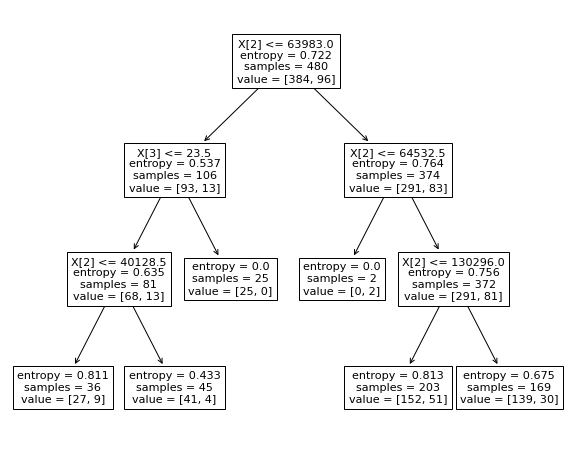

In [22]:
tree.plot_tree(model);

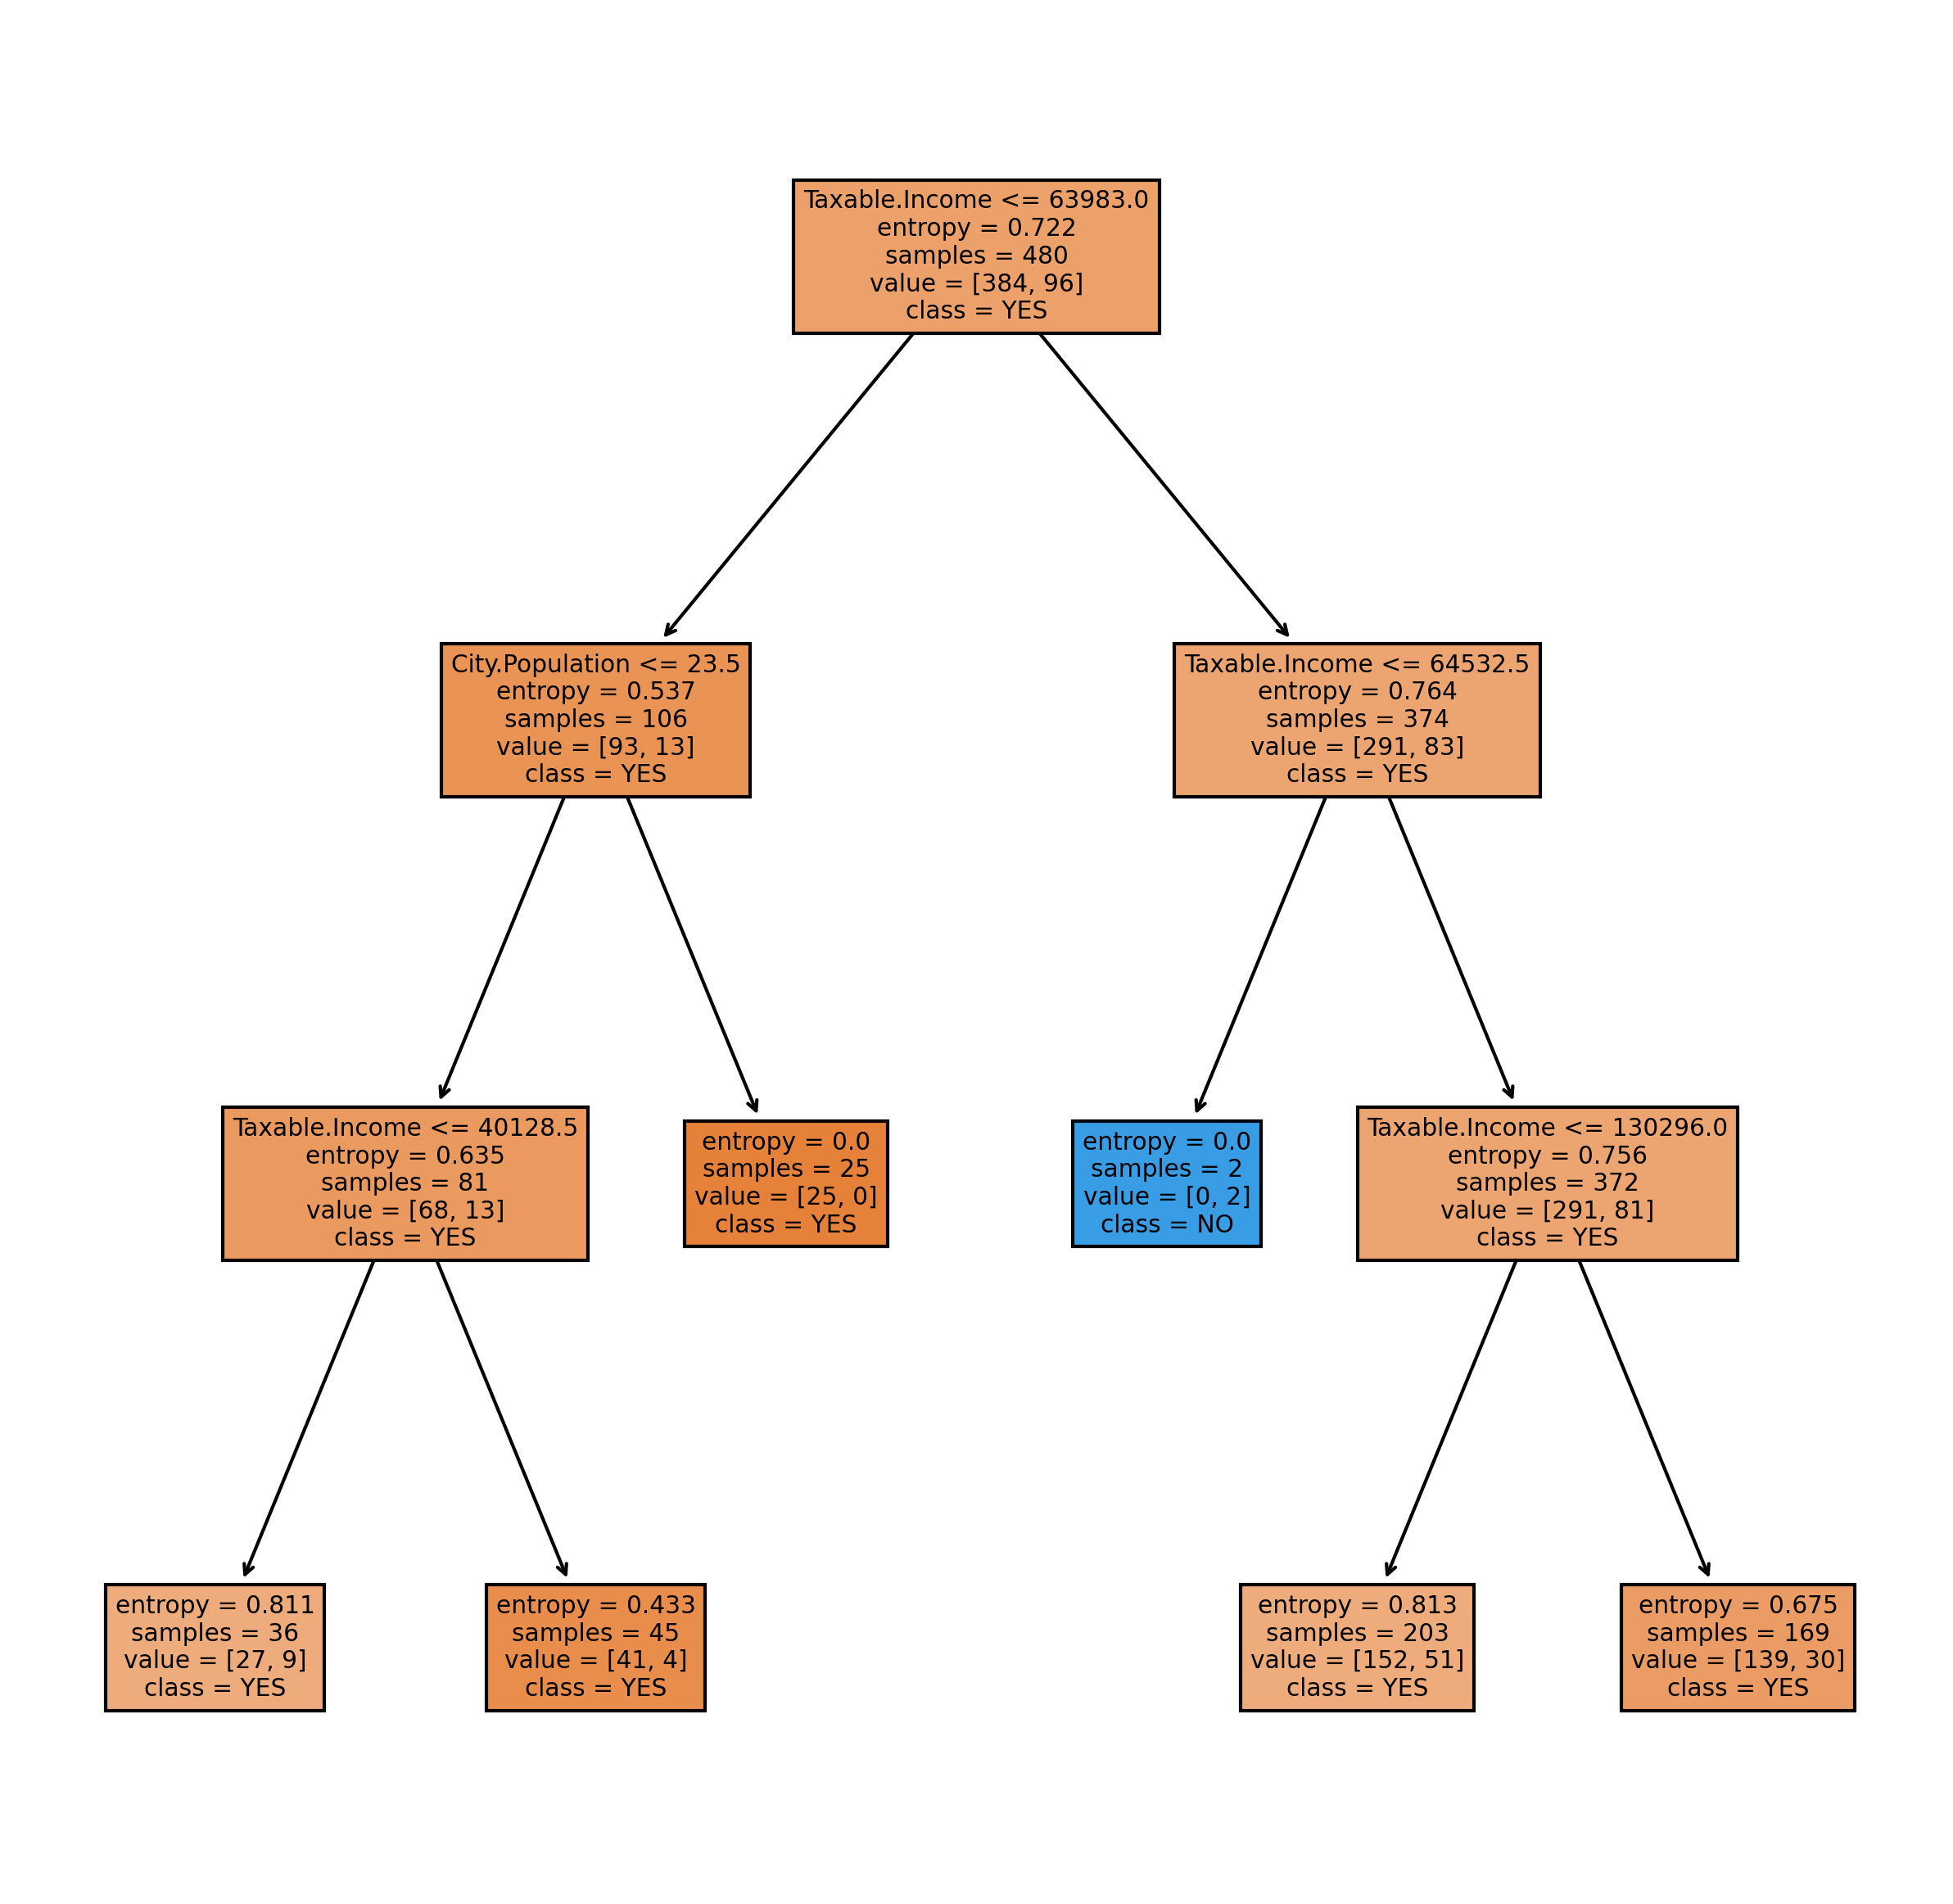

In [23]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8041666666666667

In [25]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [26]:
y_pred= model.predict(x_test)

In [27]:
# Here first column is for 'Good' , & second is for 'Risky'

model.predict_proba(x_test)

array([[0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.74876847, 0.25123153],
       [0.82248521, 0.17751479],
       [0.74876847, 0.25123153],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.74876847, 0.25123153],
       [0.91111111, 0.08888889],
       [0.91111111, 0.08888889],
       [0.82248521, 0.17751479],
       [0.75      , 0.25      ],
       [0.82248521, 0.17751479],
       [0.91111111, 0.08888889],
       [0.82248521, 0.17751479],
       [0.82248521, 0.17751479],
       [0.82248521, 0.17751479],
       [0.82248521, 0.17751479],
       [0.74876847, 0.25123153],
       [0.75      , 0.25      ],
       [0.74876847, 0.25123153],
       [0.91111111, 0.08888889],
       [0.91111111, 0.08888889],
       [0.74876847, 0.25123153],
       [0.74876847, 0.25123153],
       [0.74876847, 0.25123153],
       [1.        , 0.        ],
       [0.74876847, 0.25123153],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.

# Building Decision Tree Classifier(CART) using Gini Criteria

In [28]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

In [29]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
# Prediction and computing the accuracy

pred = model.predict(x_test)
pred
np.mean(pred == y_test)

0.7666666666666667

In [31]:
# Decision Tree Regression Example

from sklearn.tree import DecisionTreeRegressor

In [32]:
array = data.values
X = array[:,0:3]
Y = array[:,3]

In [33]:
Y

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 29,
       25,  6, 30, 26,  7, 14, 12, 30, 27, 15, 12,  5, 30,  0, 21, 23, 21,
        1, 30,  5,  5,  3, 16, 26,  1, 12, 10, 22, 14, 27,  2, 12, 15,  3,
       30, 23,  7, 23, 16, 25, 13, 15, 11, 23,  8, 13,  9, 15, 29, 12, 24,
        5, 29,  3, 22, 27,  2, 17, 19, 11, 26,  0,  7, 26, 24, 26, 18,  4,
       12, 29, 23, 24, 20, 29, 10, 13,  3,  6, 28, 17, 19, 18, 12, 25, 20,
       23,  5, 14, 15, 20,  6, 10,  8, 19, 11, 26,  7,  7, 21, 12, 29, 10,
       30, 11, 16, 26, 26, 13, 11,  3, 28, 27, 26,  7, 16, 12, 14, 28, 19,
        9,  6, 25, 20,  4, 23, 26, 11, 29,  2, 28, 28, 21, 25, 28, 10, 16,
       28, 29,  7,  3,  5, 11,  1,  0, 30, 21, 15, 28, 23, 22, 25, 30,  6,
       10, 24, 23, 16,  8, 13, 28, 13, 15, 22, 19, 20,  4, 30, 15,  0, 19,
        5, 10, 11, 19,  7, 10, 25, 28, 13, 21,  4, 28,  9, 17, 27,  0,  4,
       14, 20, 16, 28,  3, 25, 13,  8, 14, 13, 16, 22, 22, 19, 19,  9, 30,
       14, 27, 17, 25,  0

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.33, random_state=1)

In [35]:
model1 = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
# Find the accuracy
model.score(X_test, y_test)

0.7878787878787878

Accuracy is 78.78%